📊 Régression Linéaire :
   🔹 MAE  = 0.30
   🔹 RMSE = 0.38
   🔹 R²   = 0.2425

📊 Régression Polynomiale (Degré 2) :
   🔹 MAE  = 0.26
   🔹 RMSE = 0.31
   🔹 R²   = 0.4921

📊 Gradient Boosting :
   🔹 MAE  = 0.00
   🔹 RMSE = 0.00
   🔹 R²   = 1.0000



/home/agodiveau/data/temperature-project/Data-science-training/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/agodiveau/data/temperature-project/Data-science-training/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/home/agodiveau/data/temperature-project/Data-science-training/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


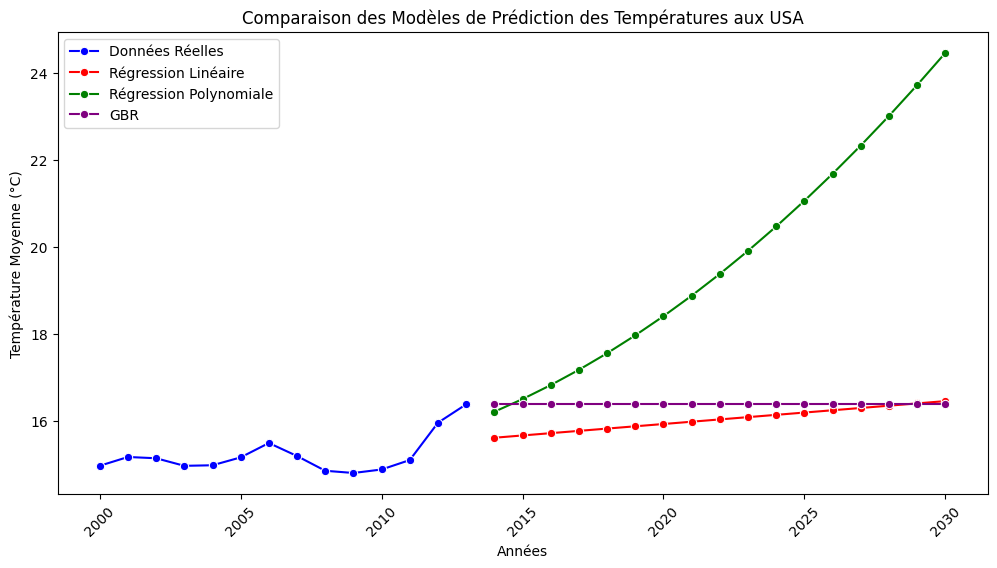

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Charger le dataset
df = pd.read_csv('GlobalLandTemperaturesByCity.csv')

# Nettoyage des données
df = df.dropna()
df['dt'] = pd.to_datetime(df['dt'], errors='coerce')

# Filtrer les données des États-Unis après 2000
targetedTime = df[(df['Country'] == 'United States') & (df['dt'].dt.year >= 2000)]
df_summer_grouped = targetedTime.groupby(targetedTime["dt"].dt.year)["AverageTemperature"].mean().reset_index()
df_summer_grouped.rename(columns={'dt': 'Year'}, inplace=True)

# 🔥 Normalisation de l'année pour améliorer l'apprentissage
df_summer_grouped["Year_Normalized"] = df_summer_grouped["Year"] - df_summer_grouped["Year"].min()
X = df_summer_grouped[["Year_Normalized"]]
y = df_summer_grouped["AverageTemperature"]

# 📌 Modèle 1 : Régression Linéaire
linear_model = LinearRegression()
linear_model.fit(X, y)

# 📌 Modèle 2 : Régression Polynomiale (degré 2)
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X, y)

# 📌 Modèle 3 : Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(    n_estimators=50,  # Moins d'arbres pour éviter le surajustement
    learning_rate=0.2,  # Apprentissage plus rapide pour éviter la mémorisation
    max_depth=3,  # Limite la complexité des arbres
    random_state=42)
gbr_model.fit(X, y)

# 🔮 Prédictions sur les données réelles
linear_pred = linear_model.predict(X)
poly_pred = poly_model.predict(X)
gbr_pred = gbr_model.predict(X)

# 🔍 Calcul des métriques
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"📊 {model_name} :")
    print(f"   🔹 MAE  = {mae:.2f}")
    print(f"   🔹 RMSE = {rmse:.2f}")
    print(f"   🔹 R²   = {r2:.4f}\n")

evaluate_model(y, linear_pred, "Régression Linéaire")
evaluate_model(y, poly_pred, "Régression Polynomiale (Degré 2)")
evaluate_model(y, gbr_pred, "Gradient Boosting")

# 🔮 Prédictions futures
future_years = np.arange(df_summer_grouped['Year'].max() + 1, 2031).reshape(-1, 1)
future_years_normalized = future_years - df_summer_grouped["Year"].min()

linear_predictions = linear_model.predict(future_years_normalized)
poly_predictions = poly_model.predict(future_years_normalized)
gbr_predictions = gbr_model.predict(future_years_normalized)

# 📊 Création des DataFrames des prédictions
df_linear_predictions = pd.DataFrame({
    "Year": future_years.flatten(),
    "AverageTemperature": linear_predictions,
    "Type": "Prédiction (Régression Linéaire)"
})

df_poly_predictions = pd.DataFrame({
    "Year": future_years.flatten(),
    "AverageTemperature": poly_predictions,
    "Type": "Prédiction (Régression Polynomiale)"
})

df_gbr_predictions = pd.DataFrame({
    "Year": future_years.flatten(),
    "AverageTemperature": gbr_predictions,
    "Type": "Prédiction (GBR)"
})

# Fusion avec les vraies données historiques
final_dataset = pd.concat([df_summer_grouped, df_linear_predictions, df_poly_predictions, df_gbr_predictions])

# 📉 Affichage des prédictions des trois modèles
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="AverageTemperature", data=df_summer_grouped, marker="o", label="Données Réelles", color="blue")
sns.lineplot(x="Year", y="AverageTemperature", data=df_linear_predictions, marker="o", label="Régression Linéaire", color="red")
sns.lineplot(x="Year", y="AverageTemperature", data=df_poly_predictions, marker="o", label="Régression Polynomiale", color="green")
sns.lineplot(x="Year", y="AverageTemperature", data=df_gbr_predictions, marker="o", label="GBR", color="purple")

plt.xlabel("Années")
plt.ylabel("Température Moyenne (°C)")
plt.title("Comparaison des Modèles de Prédiction des Températures aux USA")
plt.legend()
plt.xticks(rotation=45)
plt.show()
